# 로지스틱 회귀(이항분류)

종속변수가 `0`, `1`로만 구성된 회귀분석

`0`은 음성, `1`은 양성으로 본다면 둘 중 하나에 속할 확률을 구하는 것이므로 분류로 이해할 수 있다.

## #01. 준비작업

### [1] 패키지 가져오기

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

from helper.util import *
from helper.plot import *
from helper.analysis import *

# 로지스틱 회귀 모형
from sklearn.linear_model import LogisticRegression

## Case 1. 닥스훈트와 진돗개 분류 모형

### [1] 데이터 가져오기

닥스훈트와 진돗개의 몸 길이와 키를 조사한 가상 데이터

![img](res/img1.png)

In [4]:
origin = my_read_excel("https://data.hossam.kr/mldata/dogs.xlsx", categories=['dog'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   dog     200 non-null    category
 1   length  200 non-null    float64 
 2   height  200 non-null    float64 
dtypes: category(1), float64(2)
memory usage: 3.6 KB
None

데이터프레임 상위 5개 행
+----+-------+----------+----------+
|    | dog   |   length |   height |
|----+-------+----------+----------|
|  0 | d     |    55.01 |    29.27 |
|  1 | d     |    59.01 |    29.39 |
|  2 | d     |    56.53 |     28.5 |
|  3 | d     |    53.66 |     28.5 |
|  4 | d     |    49.67 |    31.97 |
+----+-------+----------+----------+

데이터프레임 하위 5개 행
+-----+-------+----------+----------+
|     | dog   |   length |   height |
|-----+-------+----------+----------|
| 195 | j     |    50.95 |    52.37 |
| 196 | j     |    51.86 |     52.4 |
| 197 | j     |    54.24 |    47.82 |
| 198 | j     |    53.13 |    50.22 |
| 199 | j     |  

### [2] 산점도를 통한 데이터 분포 확인

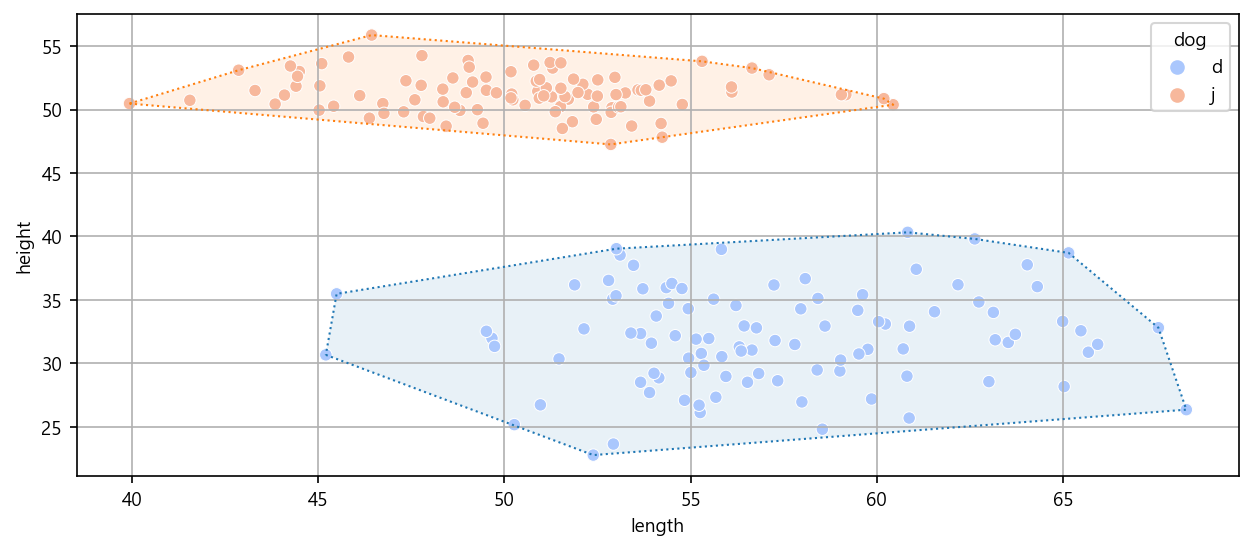

In [5]:
my_convex_hull(origin, xname="length", yname="height", hue='dog')

> 닥스훈트와 진돗개의 품종에 따라 신체적인 특징이 구분됨을 확인할 수 있다.

### [3] 데이터 전처리

#### (1) 종속변수 라벨링

In [6]:
df = origin.copy()
df['dog'] = df['dog'].map({'d': 0, 'j': 1})
df

,dog,length,height
0,0,55.01,29.27
1,0,59.01,29.39
2,0,56.53,28.50
3,0,53.66,28.50
4,0,49.67,31.97
...,...,...,...
195,1,50.95,52.37
196,1,51.86,52.40
197,1,54.24,47.82
198,1,53.13,50.22


#### (3) 훈련, 검증 데이터 분리

In [7]:
x_train, x_test, y_train, y_test = my_train_test_split(df, yname='dog', test_size=0.2, scalling=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 2), (40, 2), (160,), (40,))

### [4] 로지스틱 회귀 모형

In [8]:
estimator = LogisticRegression()
estimator.fit(x_train, y_train)
print("훈련데이터 점수: ", estimator.score(x_train, y_train))
print("검증데이터 점수: ", estimator.score(x_test, y_test))

훈련데이터 점수:  1.0
검증데이터 점수:  1.0


### [5] 검증데이터를 통한 추정값 생성

In [9]:
y_pred = estimator.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

### [6] 결과 시각화

In [10]:
df1 = x_test.copy()
df1['y_test'] = y_test
df1['y_pred'] = y_pred
df1.head()

,length,height,y_test,y_pred
50,54.08,33.72,0,0
127,51.63,51.02,1,1
37,55.62,35.05,0,0
149,51.83,49.04,1,1
19,53.11,38.53,0,0


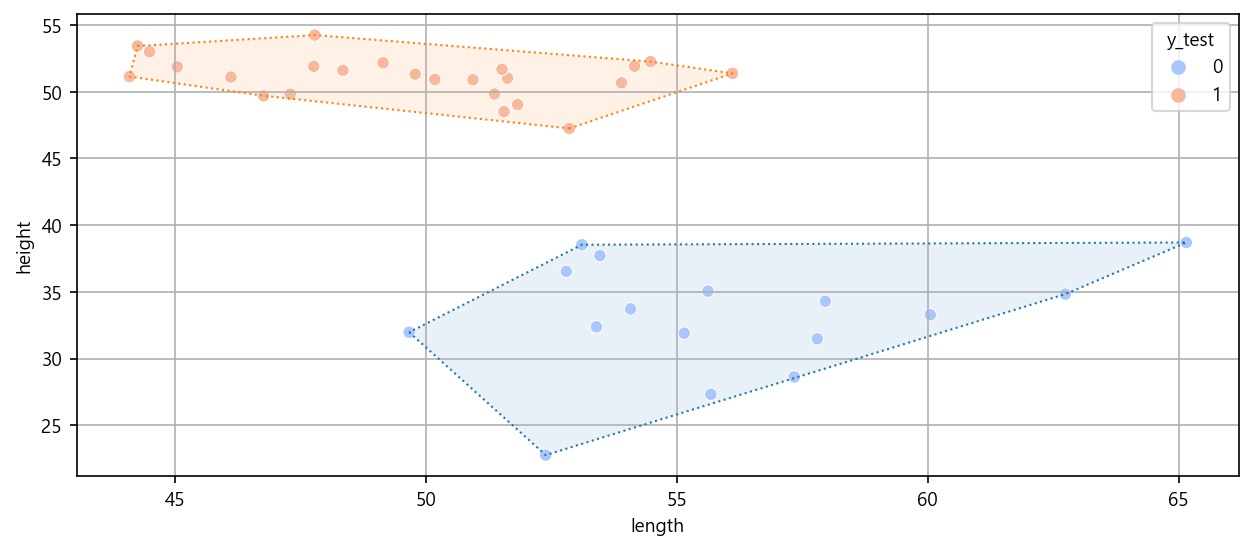

In [11]:
my_convex_hull(df1, xname="length", yname="height", hue='y_test')

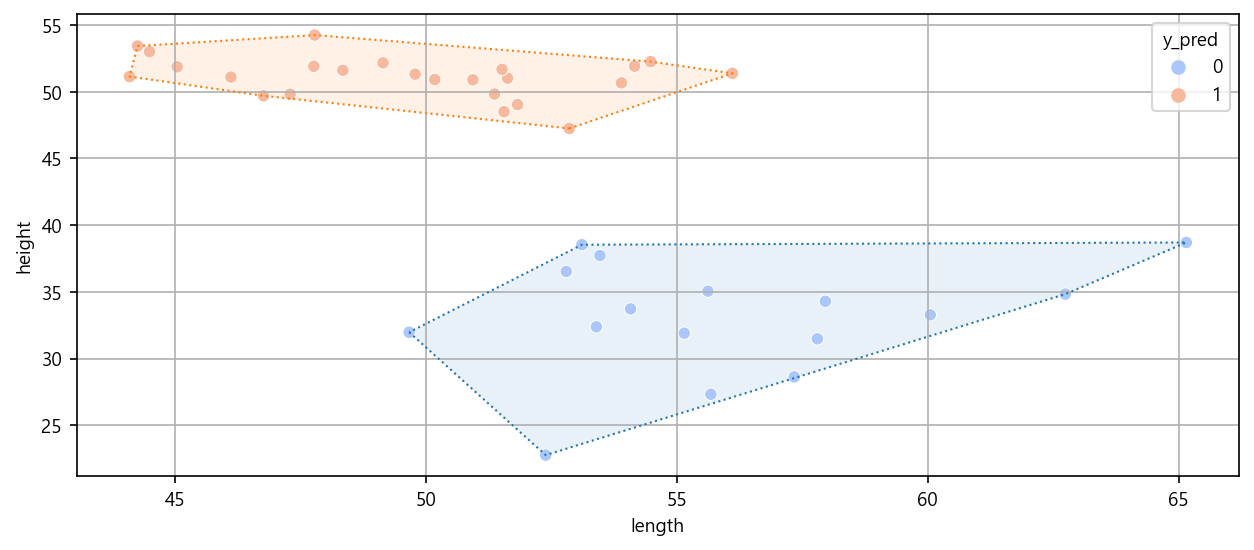

In [12]:
my_convex_hull(df1, xname="length", yname="height", hue='y_pred')

### [7] 새로운 정보 투입

훈련 모델에게 임의의 height와 length값을 투입했을 때 어떤 종으로 판별하는지 확인

In [13]:
input_df = DataFrame({
    'length': [47, 39, 52],
    'height': [23, 42, 49]
})

estimator.predict(input_df)

array([0, 1, 1], dtype=int64)

## Case 2. 대학원 합격 여부 예측 모형

어느 대학원의 방사선학 석사과정 대학원생 모집을 하였다.

지원한 학생에 대한 방사선사의 대학원 합격 여부를 예측할 수 있는 모형을 만들어 보자

### [1] 데이터 가져오기

| 변수 | 구분 | 설명 |
|---|---|---|
| 합격여부 | 범주형 | 1=합격, 0=불합격 |
| 필기점수 | 연속형 | 800점 만점 |
| 학부성적 | 연속형 | 4.0 만점 |
| 병원경력 | 범주형 | 10년이상, 5~10년, 1~5년, 1년 미만 |

In [21]:
origin = my_read_excel("https://data.hossam.kr/mldata/graduate.xlsx", categories=['합격여부', '병원경력'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   합격여부    400 non-null    category
 1   필기점수    400 non-null    int64   
 2   학부성적    400 non-null    float64 
 3   병원경력    400 non-null    category
dtypes: category(2), float64(1), int64(1)
memory usage: 7.5 KB
None

데이터프레임 상위 5개 행
+----+------------+------------+------------+------------+
|    |   합격여부 |   필기점수 |   학부성적 | 병원경력   |
|----+------------+------------+------------+------------|
|  0 |          0 |        380 |       3.61 | 1~5년      |
|  1 |          1 |        660 |       3.67 | 1~5년      |
|  2 |          1 |        800 |          4 | 10년 이상  |
|  3 |          1 |        640 |       3.19 | 1년 미만   |
|  4 |          0 |        520 |       2.93 | 1년 미만   |
+----+------------+------------+------------+------------+

데이터프레임 하위 5개 행
+-----+------------+------------+------------+------------+
|   

### [2] 데이터 전처리

#### (1) 스케일링

In [15]:
std_df = my_standard_scaler(origin, yname='합격여부')
my_pretty_table(std_df.head())

+----+------------+------------+------------+------------+
|    |   필기점수 |   학부성적 | 병원경력   |   합격여부 |
|----+------------+------------+------------+------------|
|  0 |   -1.80026 |   0.579072 | 1~5년      |          0 |
|  1 |   0.626668 |   0.736929 | 1~5년      |          1 |
|  2 |    1.84013 |    1.60514 | 10년 이상  |          1 |
|  3 |   0.453316 |  -0.525927 | 1년 미만   |          1 |
|  4 |  -0.586797 |   -1.20997 | 1년 미만   |          0 |
+----+------------+------------+------------+------------+


#### (2) 더미변수 생성

In [16]:
dummy_df = my_dummies(std_df, '병원경력')
my_pretty_table(dummy_df.head())

+----+------------+------------+------------+------------------+---------------------+-------------------+
|    |   필기점수 |   학부성적 |   합격여부 |   병원경력_1~5년 |   병원경력_1년 미만 |   병원경력_5~10년 |
|----+------------+------------+------------+------------------+---------------------+-------------------|
|  0 |   -1.80026 |   0.579072 |          0 |                1 |                   0 |                 0 |
|  1 |   0.626668 |   0.736929 |          1 |                1 |                   0 |                 0 |
|  2 |    1.84013 |    1.60514 |          1 |                0 |                   0 |                 0 |
|  3 |   0.453316 |  -0.525927 |          1 |                0 |                   1 |                 0 |
|  4 |  -0.586797 |   -1.20997 |          0 |                0 |                   1 |                 0 |
+----+------------+------------+------------+------------------+---------------------+-------------------+


### [3] 데이터 분포 확인

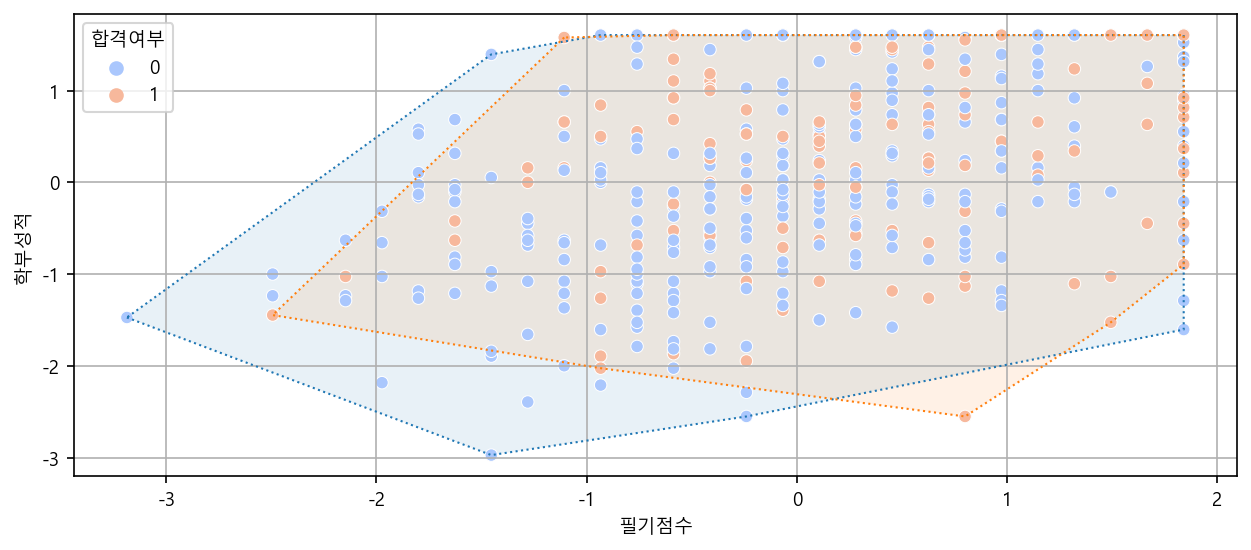

In [17]:
my_convex_hull(dummy_df, xname="필기점수", yname="학부성적", hue='합격여부')

### [4] 훈련, 검증 데이터 분리

In [18]:
x_train, x_test, y_train, y_test = my_train_test_split(dummy_df, yname='합격여부', test_size=0.2, scalling=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 5), (80, 5), (320,), (80,))

### [5] 로지스틱 회귀 모형

In [19]:
estimator = LogisticRegression()
estimator.fit(x_train, y_train)
print("훈련데이터 점수: ", estimator.score(x_train, y_train))
print("검증데이터 점수: ", estimator.score(x_test, y_test))

훈련데이터 점수:  0.696875
검증데이터 점수:  0.7125


In [20]:
df = x_test.copy()
df['y_test'] = y_test
df['y_pred'] = estimator.predict(x_test)
df['result'] = df['y_test'] == df['y_pred']
my_pretty_table(df)

+-----+------------+-------------+------------------+---------------------+-------------------+----------+----------+----------+
|     |   필기점수 |    학부성적 |   병원경력_1~5년 |   병원경력_1년 미만 |   병원경력_5~10년 |   y_test |   y_pred | result   |
|-----+------------+-------------+------------------+---------------------+-------------------+----------+----------+----------|
| 234 |    1.84013 |    0.368596 |                0 |                   0 |                 0 |        1 |        1 | True     |
|  42 |   0.106612 |   -0.631165 |                0 |                   0 |                 1 |        1 |        0 | False    |
| 303 |    0.80002 |     1.55252 |                0 |                   0 |                 1 |        1 |        0 | False    |
| 155 | -0.0667406 |    -1.39414 |                0 |                   1 |                 0 |        1 |        0 | False    |
| 342 |  -0.760149 |      1.4736 |                0 |                   1 |                 0 |        0 |        0 | True